In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

plt.style.use('seaborn-poster')
%matplotlib inline

In [6]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        # Because size of X_even and X_odd is N/2 so that we need divide factor into 2 arrays
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
#         X = X_even+factor*X_odd
        return X

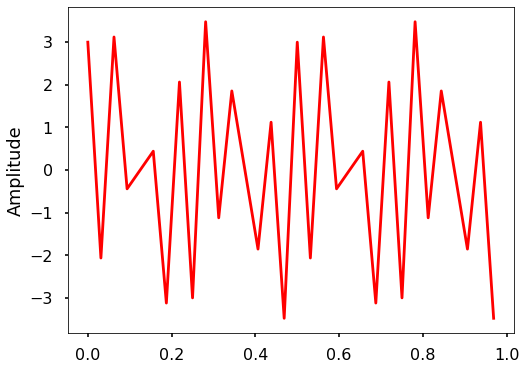

In [7]:
# sampling rate
sr = 32
# sampling interval
ts = 1/sr
t = np.arange(0,1,ts)

freq = 50
x = 3*np.cos(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

# freq = 7   
# x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

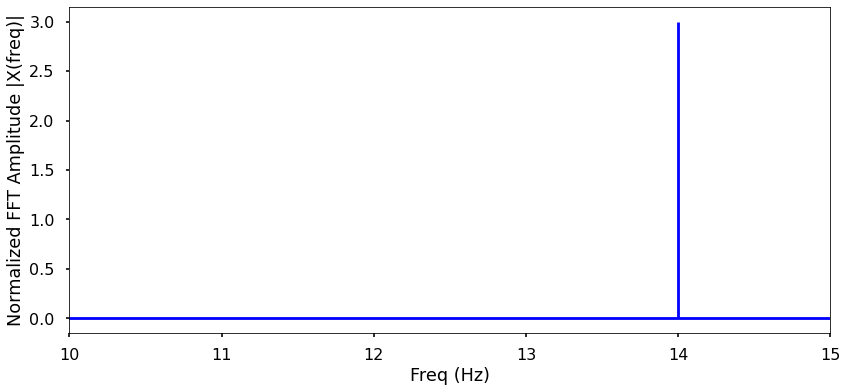

In [15]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (30, 6))

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.xlim(10,15)

plt.show()
# print(X)

(10.0, 25.0)

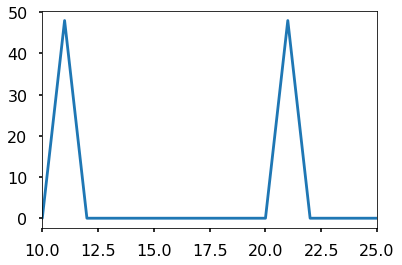

In [59]:
plt.plot(abs(X))
plt.xlim(10, 25)


In [47]:
fft.fft(x)

array([-4.80828614e-15-0.00000000e+00j,  4.80000000e+01-5.61976939e-15j,
       -2.22730353e-17+1.26075195e-15j, -2.17276464e-15-1.46017172e-15j,
        7.66951701e-17-2.69147379e-15j,  2.54033645e-15+1.58269566e-15j,
        1.88836409e-15+2.91972432e-15j, -3.04889312e-15+5.72414741e-16j,
        9.64873590e-16-2.88657986e-15j,  3.04889312e-15-1.78533984e-15j,
       -1.15357601e-15-1.10863901e-15j,  2.78873407e-15+3.87736562e-16j,
        7.66951701e-17+1.74941831e-15j, -3.15630588e-15-2.65212625e-16j,
        7.57061115e-16-9.91254548e-16j,  3.55271368e-15+2.90698870e-16j,
       -3.67394040e-16-0.00000000e+00j,  3.55271368e-15-2.90698870e-16j,
        7.57061115e-16+9.91254548e-16j, -3.15630588e-15+2.65212625e-16j,
        7.66951701e-17-1.74941831e-15j,  2.78873407e-15-3.87736562e-16j,
       -1.15357601e-15+1.10863901e-15j,  3.04889312e-15+1.78533984e-15j,
        9.64873590e-16+2.88657986e-15j, -3.04889312e-15-5.72414741e-16j,
        1.88836409e-15-2.91972432e-15j,  2.54033645